# Baseball Prediction and Pythagorean expectations




In [10]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.special import gamma, factorial
from datetime import datetime
import statsmodels.api as sm
import statistics
import time
import pemod as pe


In [12]:
# parameters
n_sim      = 10         # number of simulations 
pe_exp     = 1.83        # exponent to compute PE
shape      = 1.83        # common shape parameter of the Weibull dist.
pe_method  = "basic"     # {basic, davenport, smyth}
tol_method = 2           # {1, 2}: 1(2) is without(with) intercept
sim_method = "basic"      # {"basic", "bayes", "opp", "both"}: bayesian updating for scale param; include opponent strength 
opp_param  = 0.5        # reduction in scale param. associated with a strong opponent
rs_0       = 4           # expected runs in week 1



In [13]:
# set tolerance parameters 
season_data = pe.data_read(2010)
tol_prm, bs = pe.params(season_data, pe_exp, shape, rs_0, method = tol_method)
eps1 = 1.5
eps2 = .5


In [14]:
sim_method = "basic"     # {"basic", "bayes", "opp", "both"}: bayesian updating for scale param; include opponent strength 
n_sim      = 400        # number of simulations 
b_score = pd.Series(index = range(2010, 2023))

start = time.time()

eps1 = 1.5
eps2 = 0.5

for year in range(2010, 2023):
    print("Year:  ", year)
    season_data = pe.data_read(year)
    
    # bayesian updating
    pr1, scale_bayes = pe.params(season_data, pe_exp, shape, rs_0)
       
    # simulate 
    sim_g, rej = pe.season_sim(season_data, scale_bayes, n_sim, eps1, eps2, shape, pe_method, sim_method, opp_param)
    #print(len(sim_g))
    #print(sum(sim_g["prob"]))
    #print(' ')
    #print(sim_g["prob"])
    #print(' ')
    
    # prediction
    #pred = pd.Series(sim_g[sim_g["res(team_1)"]==1]["prob"].sum(), index = season_data.index)

    
    # Brier Score
    b_score[year] = pe.bscore(sim_g, season_data["team1_win"])
    #print(b_score)
    

finish = time.time()

print("run time:", (finish-start)/60, "minutes." )

C:\Users\steve\AppData\Local\Temp\ipykernel_19476\4054592999.py:3: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  b_score = pd.Series(index = range(2010, 2023))


Year:   2010
Year:   2011
Year:   2012
Year:   2013
Year:   2014
Year:   2015
Year:   2016
Year:   2017
Year:   2018
Year:   2019
Year:   2020
Year:   2021
Year:   2022
run time: 110.60146872202556 minutes.


In [15]:
b_score1 = b_score

In [16]:
b_score

2010    0.253700
2011    0.256144
2012    0.259749
2013    0.254585
2014    0.258719
2015    0.254844
2016    0.257574
2017    0.254691
2018    0.246452
2019    0.252872
2020    0.262838
2021    0.252146
2022    0.252511
dtype: float64

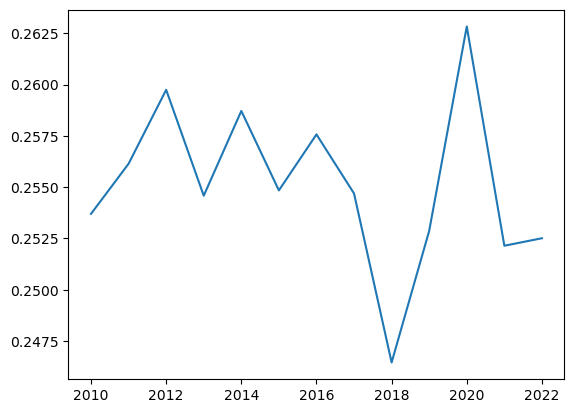

In [17]:
plt.plot(b_score1)

In [18]:
sim_method = "bayes"     # {"basic", "bayes", "opp", "both"}: bayesian updating for scale param; include opponent strength 
n_sim      = 400        # number of simulations 
b_score = pd.Series(index = range(2010, 2023))

start = time.time()

eps1 = 1.5
eps2 = 0.5

for year in range(2010, 2023):
    print("Year:  ", year)
    season_data = pe.data_read(year)
    
    # bayesian updating
    pr1, scale_bayes = pe.params(season_data, pe_exp, shape, rs_0)
       
    # simulate 
    sim_g, rej = pe.season_sim(season_data, scale_bayes, n_sim, eps1, eps2, shape, pe_method, sim_method, opp_param)
    #print(len(sim_g))
    #print(sum(sim_g["prob"]))
    #print(' ')
    #print(sim_g["prob"])
    #print(' ')
    
    # prediction
    #pred = pd.Series(sim_g[sim_g["res(team_1)"]==1]["prob"].sum(), index = season_data.index)

    
    # Brier Score
    b_score[year] = pe.bscore(sim_g, season_data["team1_win"])
    #print(b_score)
    

finish = time.time()

print("run time:", (finish-start)/60, "minutes." )

C:\Users\steve\AppData\Local\Temp\ipykernel_19476\144899493.py:3: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  b_score = pd.Series(index = range(2010, 2023))


Year:   2010
Year:   2011
Year:   2012
Year:   2013
Year:   2014
Year:   2015
Year:   2016
Year:   2017
Year:   2018
Year:   2019
Year:   2020
Year:   2021
Year:   2022
run time: 127.9648722132047 minutes.


In [19]:
b_score2 = b_score

In [20]:
b_score

2010    0.252677
2011    0.254556
2012    0.261260
2013    0.253188
2014    0.258569
2015    0.255109
2016    0.257135
2017    0.253853
2018    0.244058
2019    0.250683
2020    0.259719
2021    0.254005
2022    0.251501
dtype: float64

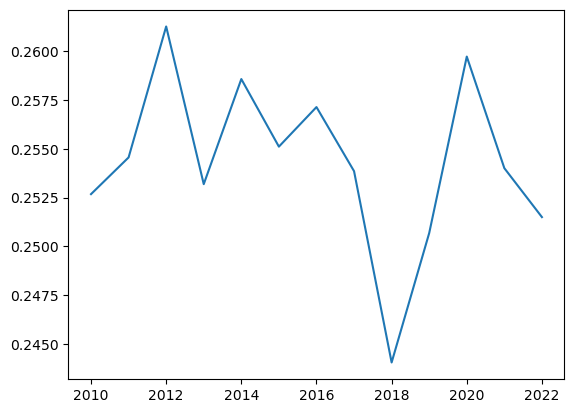

In [21]:
plt.plot(b_score2)

In [22]:
sim_method = "opp"     # {"basic", "bayes", "opp", "both"}: bayesian updating for scale param; include opponent strength 
n_sim      = 400        # number of simulations 
b_score = pd.Series(index = range(2010, 2023))

start = time.time()

eps1 = 1.5
eps2 = 0.5

for year in range(2010, 2023):
    print("Year:  ", year)
    season_data = pe.data_read(year)
    
    # bayesian updating
    pr1, scale_bayes = pe.params(season_data, pe_exp, shape, rs_0)
       
    # simulate 
    sim_g, rej = pe.season_sim(season_data, scale_bayes, n_sim, eps1, eps2, shape, pe_method, sim_method, opp_param)
    #print(len(sim_g))
    #print(sum(sim_g["prob"]))
    #print(' ')
    #print(sim_g["prob"])
    #print(' ')
    
    # prediction
    #pred = pd.Series(sim_g[sim_g["res(team_1)"]==1]["prob"].sum(), index = season_data.index)

    
    # Brier Score
    b_score[year] = pe.bscore(sim_g, season_data["team1_win"])
    #print(b_score)
    

finish = time.time()

print("run time:", (finish-start)/60, "minutes." )

C:\Users\steve\AppData\Local\Temp\ipykernel_19476\4170151138.py:3: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  b_score = pd.Series(index = range(2010, 2023))


Year:   2010
Year:   2011
Year:   2012
Year:   2013
Year:   2014
Year:   2015
Year:   2016
Year:   2017
Year:   2018
Year:   2019
Year:   2020
Year:   2021
Year:   2022
run time: 117.74381187756856 minutes.


In [23]:
b_score3 = b_score

In [24]:
b_score

2010    0.251619
2011    0.251301
2012    0.252068
2013    0.249298
2014    0.252082
2015    0.250964
2016    0.252793
2017    0.250214
2018    0.244289
2019    0.246810
2020    0.257053
2021    0.248652
2022    0.246658
dtype: float64

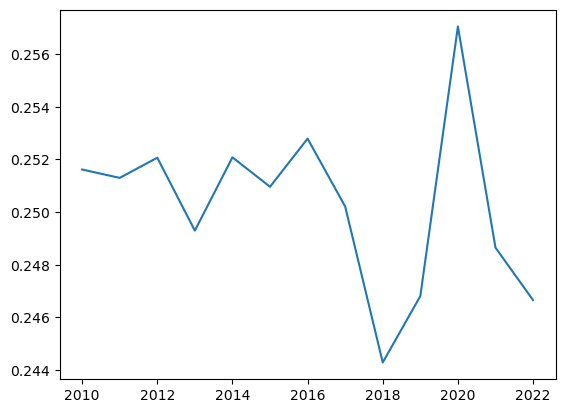

In [25]:
plt.plot(b_score3)

In [26]:
sim_method = "both"     # {"basic", "bayes", "opp", "both"}: bayesian updating for scale param; include opponent strength 
n_sim      = 400        # number of simulations 
b_score = pd.Series(index = range(2010, 2023))

start = time.time()

eps1 = 1.5
eps2 = 0.5

for year in range(2010, 2023):
    print("Year:  ", year)
    season_data = pe.data_read(year)
    
    # bayesian updating
    pr1, scale_bayes = pe.params(season_data, pe_exp, shape, rs_0)
       
    # simulate 
    sim_g, rej = pe.season_sim(season_data, scale_bayes, n_sim, eps1, eps2, shape, pe_method, sim_method, opp_param)
    #print(len(sim_g))
    #print(sum(sim_g["prob"]))
    #print(' ')
    #print(sim_g["prob"])
    #print(' ')
    
    # prediction
    #pred = pd.Series(sim_g[sim_g["res(team_1)"]==1]["prob"].sum(), index = season_data.index)

    
    # Brier Score
    b_score[year] = pe.bscore(sim_g, season_data["team1_win"])
    #print(b_score)
    

finish = time.time()

print("run time:", (finish-start)/60, "minutes." )

C:\Users\steve\AppData\Local\Temp\ipykernel_19476\1463716518.py:3: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  b_score = pd.Series(index = range(2010, 2023))


Year:   2010
Year:   2011
Year:   2012
Year:   2013
Year:   2014
Year:   2015
Year:   2016
Year:   2017
Year:   2018
Year:   2019
Year:   2020
Year:   2021
Year:   2022
run time: 113.87964599529901 minutes.


In [27]:
b_score4 = b_score

In [28]:
b_score

2010    0.251881
2011    0.250754
2012    0.255085
2013    0.249089
2014    0.255243
2015    0.250456
2016    0.252740
2017    0.250786
2018    0.245240
2019    0.246143
2020    0.253807
2021    0.249877
2022    0.247329
dtype: float64

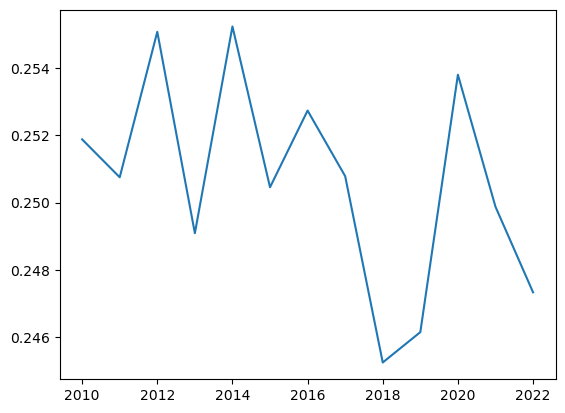

In [29]:
plt.plot(b_score4)

In [36]:
simulations = {
    'Basic': b_score1,
    'Bayes': b_score2,
    'Opp': b_score3,
    'Both': b_score4
    }

In [38]:
df = pd.DataFrame(simulations)

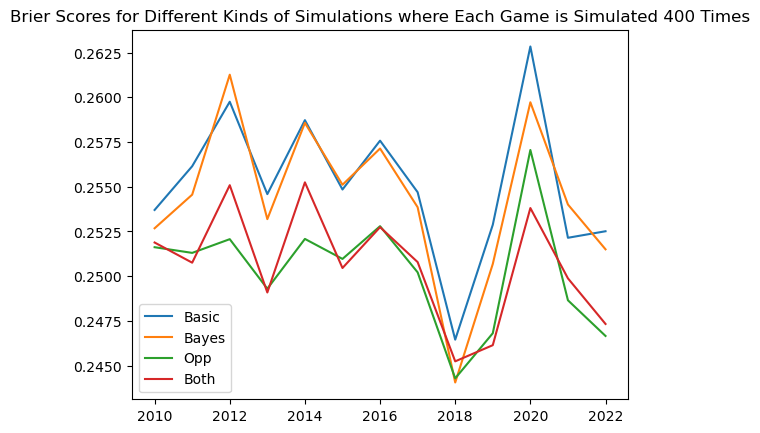

In [43]:
df.plot()
plt.title('Brier Scores for Different Kinds of Simulations where Each Game is Simulated 400 Times')
plt.show()

In [49]:
print(np.mean(b_score1))
print(np.std(b_score1))

print(np.mean(b_score2))
print(np.std(b_score2))

print(np.mean(b_score3))
print(np.std(b_score3))

print(np.mean(b_score4))
print(np.std(b_score4))

0.25514051647094954
0.003916493539002322
0.2543316742399322
0.004249429272660958
0.2502923681092537
0.0031206767879212905
0.250648526695331
0.0030423816701885143


In [50]:
import math
from CalScore import cal_brier_score
import matplotlib.pyplot as plt

In [52]:
##Read data from 538 csv file as Elo_data
Elo_data = pd.read_csv("./mlb_elo_data/mlb_elo.csv")

In [53]:
def get_averages (Elo_data):
    for year in range(2010,2023):
        #create a dataframe for the data coming from that year
        year_data = Elo_data.loc[Elo_data.season == year]
        #adds a column of a prediction coming from the win percentage expectations
        year_data.insert(len(year_data.T),"prediction", (year_data["rating_prob1"].values>.5)*1)
        #adds a column of the actual win coming from the scores
        year_data.insert(len(year_data.T),"actual", (year_data["score1"].values>year_data["score2"])*1)
        #adds a column of whether or not the prediction was correct
        year_data.insert(len(year_data.T),"prediction_correct", (year_data["prediction"].values == year_data["actual"])*1)
        #Print out what the accuracy of the prediction is given by
        print("The prediction accuracy is given by " + str(year_data.prediction_correct.sum()/len(year_data)))

In [55]:
## Initialize the score for benchmark methods
years = np.arange(2010, 2023)
num_methods = 2
scores = np.zeros((num_methods, len(years)))

## Choose the second half of the season each year
r = 0.5

## Calculate scores for benchmark methods each year
for i in range(len(years)):
    year_data = Elo_data.loc[Elo_data.season == years[i]]
    actual_result = ((year_data["score1"]>year_data["score2"])*1).to_numpy()
    start_i = int(len(actual_result) * r)
    actual_result = actual_result[start_i:]

    # Method 1
    scores[0, i] = cal_brier_score(year_data["elo_prob1"].to_numpy()[start_i:], actual_result)
    
    # Method 2
    scores[1, i] = cal_brier_score(year_data["rating_prob1"].to_numpy()[start_i:], actual_result)

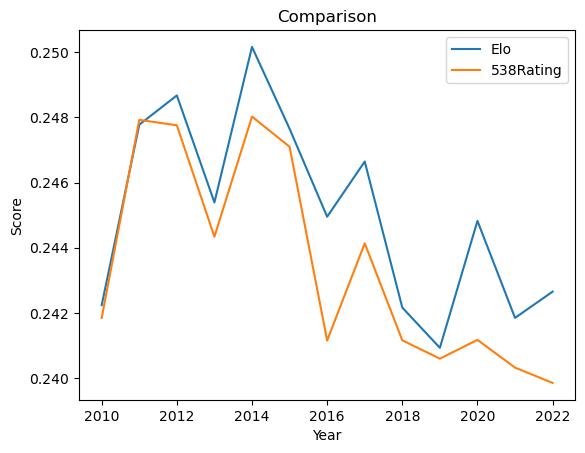

<Figure size 2000x1200 with 0 Axes>

In [56]:
# Labels of methods
name_lines = ['Elo', '538Rating']

# Plot score data
plt.title('Comparison')
for i in range(num_methods):
    plt.plot(years, scores[i, :], label = name_lines[i])
plt.legend()
plt.xlabel('Year')
plt.ylabel('Score')
plt.figure(figsize=(20,12))
plt.rcParams['figure.figsize'] = [10, 6]
plt.show()

In [57]:
type(scores[0])

numpy.ndarray

In [59]:
type(b_score)

pandas.core.series.Series

In [60]:
comparisons = {
    'Opp': b_score3,
    'Elo': scores[0],
    '538 Rating': scores[1]
    }

In [61]:
df2 = pd.DataFrame(comparisons)

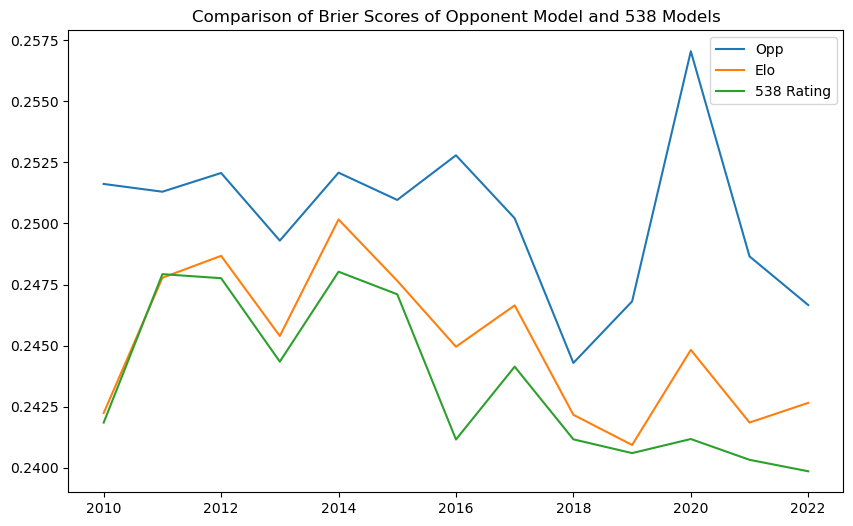

In [64]:
df2.plot()
plt.title('Comparison of Brier Scores of Opponent Model and 538 Models')
plt.show()

In [65]:
np.mean(scores[0])

0.24506992221043128

In [66]:
np.std(scores[0])

0.002848174825204676

In [67]:
np.mean(scores[1])

0.24349060487101276

In [68]:
np.std(scores[1])

0.0030793874567638835